In [1]:
from scipy import misc, ndimage, signal
from sklearn.model_selection  import train_test_split
import numpy
import numpy as np
import random
import ntpath
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import tensorflow as tf
from tensorflow.keras import datasets,layers,models,Input,Model
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, AveragePooling2D, Cropping2D
from tensorflow.keras import optimizers 
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from time import time
import time as tm
import datetime
from operator import itemgetter
import glob
from tensorflow.keras.utils import *
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.utils
from numpy import argmax
import seaborn as sn 

from random import seed
from random import randint
import cv2

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [3]:
#X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers.npy').astype(np.int16)
#Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_kmers_labels.npy').astype(np.int16)

X = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers.npy').astype(np.int16)
Y = np.load('../InpactorDB/version_final/InpactorDB_non-redudant.fasta.filtered_PosKmers_labels.npy').astype(np.int16)

(67305, 508, 508)
(67305, 1)
(67305, 224, 224)
[ 1  3  4  8  9 12 13 14 16 17 18 19 20]
31


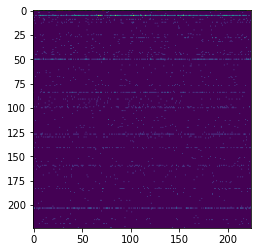

40


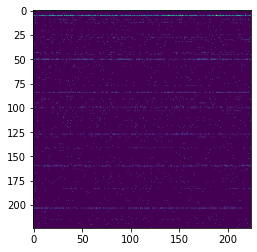

318


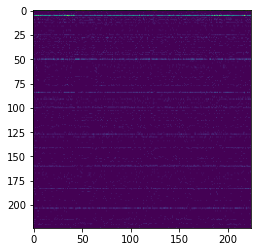

2344


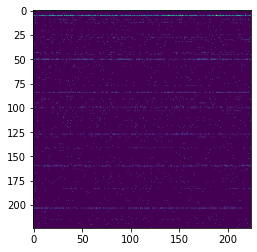

298


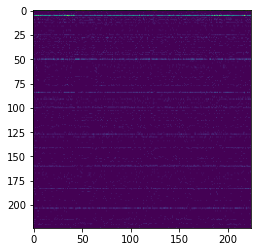

15


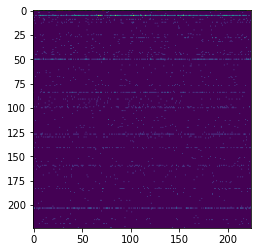

20


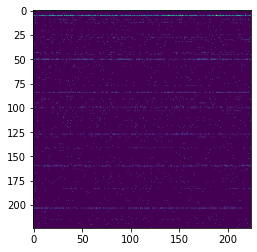

999


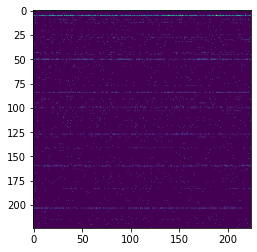

1147


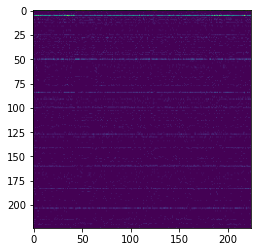

967


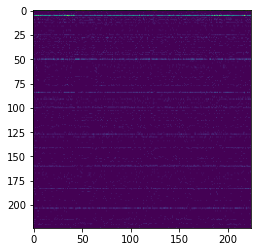

0


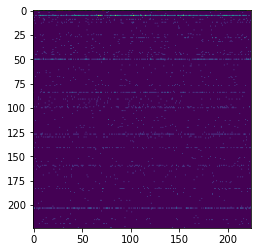

32


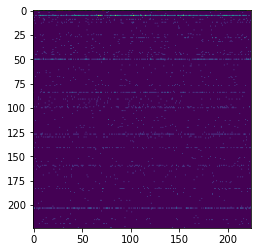

7


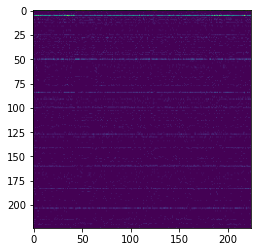

In [4]:
print(X.shape)
print(Y.shape)

X_resized = np.zeros((67305, 224, 224))

for i in range(X.shape[0]):
    X_resized[i] = cv2.resize(X[i], (224, 224), cv2.INTER_LINEAR)
    if X_resized[i].max()!=0:
        #print(X_resized[i].max())
        X_resized[i] = X_resized[i] / X_resized[i].max()

print(X_resized.shape)

X = X_resized
X_resized = None

type(X[0, 0, 0])

print(np.unique(Y))

indexes = np.where(Y == 1)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 3)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 4)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 8)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 9)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 12)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 13)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 14)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 16)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 17)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 18)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 19)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

indexes = np.where(Y == 20)
sel_i = value = randint(0, len(indexes))
print(indexes[0][sel_i])

plt.imshow(X[sel_i, :, :])
plt.show()

In [5]:
print(X[0,:,:])

[[0.5        0.83333333 1.         ... 0.83333333 0.83333333 1.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [6]:
"""scalers = {}
feature_vectors_scaler = np.zeros((X.shape[0], X.shape[1], X.shape[2]))
for i in range(X.shape[1]):
    scalers[i] = preprocessing.StandardScaler()
    feature_vectors_scaler[:, i, :] = scalers[i].fit_transform(X[:, i, :]) """

#data split: 80% train, 10% dev and 10% test
validation_size = 0.2
seed = 7
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X, Y, test_size=validation_size, random_state=seed)

X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=0.5, random_state=seed)

print(X_train.shape)
print(Y_train.shape)
print(X_dev.shape)
print(Y_dev.shape)
print(X_test.shape)
print(Y_test.shape)

(53844, 224, 224)
(53844, 1)
(6730, 224, 224)
(6730, 1)
(6731, 224, 224)
(6731, 1)


In [7]:
feature_vectors_scaler = None
X = None
Y = None
path_log_base = './logs_CNN'

In [8]:
def metrics(Y_validation,predictions):
    
    classes = len(numpy.unique(Y_validation))
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(classes), range(classes))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()

In [9]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)

    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [10]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, y_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [11]:
def graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID):
    numbers=AccTest
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Test F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Train F1-Score {}, Época:{}\n".format(value, index+1))
    
    print("")
    
    numbers=history.history['val_f1_m']
    numbers_sort = sorted(enumerate(numbers), key=itemgetter(1),  reverse=True)
    for i in range(int(len(numbers)*(0.05))): #5% Del total de las épocas
        index, value = numbers_sort[i]
        print("Validation F1-Score {}, Época:{}\n".format(value, index+1))

    with plt.style.context('seaborn-white'):
        plt.figure(figsize=(10, 10))
        #Plot training & validation accuracy values
        plt.plot(np.concatenate([np.array([accuracyTRAIN]),np.array(history.history['f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyVALID]),np.array(history.history['val_f1_m'])],axis=0))
        plt.plot(np.concatenate([np.array([accuracyTEST]),np.array(AccTest)],axis=0)) #Test
        plt.title('F1-Score Vs Epoch')
        plt.ylabel('F1-Score')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Accuracy_GBRAS-Net_'+model_Name+'.pdf', format='pdf')     
        #plt.show()
        
        plt.figure(figsize=(10, 10))
        #Plot training & validation loss values
        plt.plot(np.concatenate([np.array([lossTRAIN]),np.array(history.history['loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossVALID]),np.array(history.history['val_loss'])],axis=0))
        plt.plot(np.concatenate([np.array([lossTEST]),np.array(LossTest)],axis=0)) #Test
        plt.title('Loss Vs Epoch')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation', 'Test'], loc='upper left')
        plt.grid('on')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.eps', format='eps')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.svg', format='svg')
        #plt.savefig(path_img_base+'/Loss_GBRAS-Net_'+model_Name+'.pdf', format='pdf') 
        plt.show() 

In [12]:
def Final_Results_Test(PATH_trained_models):
    global AccTest
    global LossTest
    AccTest = []
    LossTest= [] 
    B_accuracy = 0 #B --> Best
    for filename in sorted(os.listdir(PATH_trained_models)):
        if filename != ('train') and filename != ('validation'):
            print(filename)
            model = tf.keras.models.load_model(PATH_trained_models+'/'+filename, custom_objects={'f1_m':f1_m})
            loss,accuracy = model.evaluate(X_test, one_hot_labels_test,verbose=0)
            print(f'Loss={loss:.4f} y F1-Score={accuracy:0.4f}'+'\n')
            BandAccTest  = accuracy
            BandLossTest = loss
            AccTest.append(BandAccTest)    #Valores de la precisión en Test, para graficar junto a valid y train
            LossTest.append(BandLossTest)  #Valores de la perdida en Test, para graficar junto a valid y train
            
            if accuracy > B_accuracy:
                B_accuracy = accuracy
                B_loss = loss
                B_name = filename
    
    print("\n\nBest")
    print(B_name)
    print(f'Loss={B_loss:.4f} y F1-Score={B_accuracy:0.4f}'+'\n')

In [13]:
def train(model, X_train, y_train, X_valid, y_valid, X_test, y_test, batch_size, epochs, model_name=""):
    start_time = tm.time()
    log_dir=path_log_base+"/"+model_name+"_"+str(datetime.datetime.now().isoformat()[:19].replace("T", "_").replace(":","-"))
    tensorboard = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=1)
    filepath = log_dir+"/saved-model-{epoch:03d}-{val_f1_m:.4f}.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_f1_m', save_best_only=False, mode='max')
    # early stopping
    es = EarlyStopping(monitor='loss', patience=20, mode='min', verbose=1)
    
    model.reset_states()
    
    #VALORES EN TRAIN TEST Y VALIDACIÓN INICIALES, GRÁFICOS
    global lossTEST
    global accuracyTEST
    global lossTRAIN
    global accuracyTRAIN
    global lossVALID
    global accuracyVALID
    lossTEST,accuracyTEST   = model.evaluate(X_test, y_test,verbose=None)
    lossVALID,accuracyVALID = model.evaluate(X_valid, y_valid,verbose=None)
    lossTRAIN,accuracyTRAIN = model.evaluate(X_train, y_train,verbose=None)
    
    global history
    global model_Name
    global log_Dir
    model_Name = model_name
    log_Dir = log_dir
    
    history=model.fit(X_train, y_train, epochs=epochs, 
                      callbacks=[tensorboard,checkpoint,es], 
                      batch_size=batch_size,validation_data=(X_valid, y_valid),verbose=1)
    
    metrics = model.evaluate(X_test, y_test, verbose=0)
     
    TIME = tm.time() - start_time
    print("Time "+model_name+" = %s [seconds]" % TIME)
    
    print("\n")
    print(log_dir)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [14]:
def TE_VGG19():
      model = tf.keras.applications.VGG19(weights='imagenet', include_top=False)

      # Block1_conv1 weights are of the format [3, 3, 3, 64] -> this is for RGB images
      # For grayscale, format should be [3, 3, 1, 64]. Weighted average of the features has to be calculated across channels.
      # RGB weights: Red 0.2989, Green 0.5870, Blue 0.1140

      # getting weights of block1 conv1.
      block1_conv1 = model.get_layer('block1_conv1').get_weights()
      weights, biases = block1_conv1

      # :weights shape = [3, 3, 3, 64] - (0, 1, 2, 3)
      # convert :weights shape to = [64, 3, 3, 3] - (3, 2, 0, 1)
      weights = np.transpose(weights, (3, 2, 0, 1))


      kernel_out_channels, kernel_in_channels, kernel_rows, kernel_columns = weights.shape

      # Dimensions : [kernel_out_channels, 1 (since grayscale), kernel_rows, kernel_columns]
      grayscale_weights = np.zeros((kernel_out_channels, 1, kernel_rows, kernel_columns))

      # iterate out_channels number of times
      for i in range(kernel_out_channels):

        # get kernel for every out_channel
        get_kernel = weights[i, :, :, :]

        temp_kernel = np.zeros((3, 3))

        # :get_kernel shape = [3, 3, 3]
        # axis, dims = (0, in_channel), (1, row), (2, col)

        # calculate weighted average across channel axis
        in_channels, in_rows, in_columns = get_kernel.shape

        for in_row in range(in_rows):
          for in_col in range(in_columns):
            feature_red = get_kernel[0, in_row, in_col]
            feature_green = get_kernel[1, in_row, in_col]
            feature_blue = get_kernel[2, in_row, in_col]

            # weighted average for RGB filter
            total = (feature_red * 0.2989) + (feature_green * 0.5870) + (feature_blue * 0.1140)

            temp_kernel[in_row, in_col] = total


        # :temp_kernel is a 3x3 matrix [rows x columns]
        # add an axis at the end to specify in_channel as 1

        # Second: Add axis at the start of :temp_kernel to make its shape: [1, 3, 3] which is [in_channel, rows, columns]
        temp_kernel = np.expand_dims(temp_kernel, axis=0)

        # Now, :temp_kernel shape is [1, 3, 3]

        # Concat :temp_kernel to :grayscale_weights along axis=0
        grayscale_weights[i, :, :, :] = temp_kernel

      # Dimension of :grayscale_weights is [64, 1, 3, 3]
      # In order to bring it to tensorflow or keras weight format, transpose :grayscale_weights

      # dimension, axis of :grayscale_weights = (out_channels: 0), (in_channels: 1), (rows: 2), (columns: 3)
      # tf format of weights = (rows: 0), (columns: 1), (in_channels: 2), (out_channels: 3)

      # Go from (0, 1, 2, 3) to (2, 3, 1, 0)
      grayscale_weights = np.transpose(grayscale_weights, (2, 3, 1, 0)) # (3, 3, 1, 64)

      # combine :grayscale_weights and :biases
      new_block1_conv1 = [grayscale_weights, biases]


      # Reconstruct the layers of VGG16 but replace block1_conv1 weights with :grayscale_weights

      # get weights of all the layers starting from 'block1_conv2'
      vgg19_weights = {}
      for layer in model.layers[2:]:
        if "conv" in layer.name:
          vgg19_weights["224_" + layer.name] = model.get_layer(layer.name).get_weights()

      del model


      # Custom build VGG19
      input = Input(shape=(224, 224, 1), name='224_input')
      # Block 1
      x = Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 1), data_format="channels_last", name='224_block1_conv1')(input)
      x = Conv2D(64, (3, 3), activation='relu', padding='same', name='224_block1_conv2')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block1_pool')(x)

      # Block 2
      x = Conv2D(128, (3, 3), activation='relu', padding='same', name='224_block2_conv1')(x)
      x = Conv2D(128, (3, 3), activation='relu', padding='same', name='224_block2_conv2')(x)
      x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block2_pool')(x)

      # Block 3
      #x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv1')(x)
      #x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv2')(x)
      #x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv3')(x)
      #x = Conv2D(256, (3, 3), activation='relu', padding='same', name='224_block3_conv4')(x)
      #x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block3_pool')(x)

      # Block 4
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv1')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv2')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv3')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block4_conv4')(x)
      #x = MaxPooling2D((2, 2), strides=(2, 2), name='224_block4_pool')(x)

      # Block 5
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv1')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv2')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv3')(x)
      #x = Conv2D(512, (3, 3), activation='relu', padding='same', name='224_block5_conv4')(x)
      #x = MaxPooling2D((8, 8), strides=(8, 8), name='224_block5_pool')(x)

      base_model = Model(inputs=input, outputs=x)

      base_model.get_layer('224_block1_conv1').set_weights(new_block1_conv1)
      for layer in base_model.layers[2:]:
        if 'conv' in layer.name:
          base_model.get_layer(layer.name).set_weights(vgg19_weights[layer.name])

      x = base_model.output

      for layer in base_model.layers:
          layer.trainable = True

      x = tf.keras.layers.GlobalAveragePooling2D()(x)  
      layers = tf.keras.layers.Flatten()(x)
      #layers = tf.keras.layers.Dense(128,activation="relu")(layers)
      """layers = tf.keras.layers.Dropout(0.5)(layers)
      layers = tf.keras.layers.Dense(1024 ,activation="relu")(layers)
      layers = tf.keras.layers.Dropout(0.5)(layers)
      layers = tf.keras.layers.Dense( 512,activation="relu")(layers)
      layers = tf.keras.layers.Dense( 64,activation="relu")(layers)"""
        
      layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))
      layers = tf.keras.layers.Dropout(0.5)(layers)
      layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
      layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
      layers = tf.keras.layers.Dropout(0.5)(layers)
      layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)
      layers = tf.keras.layers.Dense(200,activation="relu")(layers)#,kernel_regularizer=regularizers.l1(0.0001),bias_regularizer=regularizers.l2(0.01))(layers)
      layers = tf.keras.layers.Dropout(0.5)(layers)
      layers = tf.keras.layers.BatchNormalization(momentum=0.99, epsilon=0.001, center=True, scale=False, trainable=True, fused=None, renorm=False, renorm_clipping=None, renorm_momentum=0.4, adjustment=None)(layers)

      predictions = tf.keras.layers.Dense(21, activation="softmax", name="output_1")(layers)

      #Compilador
      model = tf.keras.Model(inputs = base_model.input, outputs=predictions)
      optimizer=tf.keras.optimizers.Adam(lr=0.001) 
      model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=[f1_m])
      model.summary()
      return model

In [15]:
model = TE_VGG19()
# summarize layers
print(model.summary())
#tf.keras.utils.plot_model(model, show_shapes=True)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
224_input (InputLayer)       [(None, 224, 224, 1)]     0         
_________________________________________________________________
224_block1_conv1 (Conv2D)    (None, 224, 224, 64)      640       
_________________________________________________________________
224_block1_conv2 (Conv2D)    (None, 224, 224, 64)      36928     
_________________________________________________________________
224_block1_pool (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
224_block2_conv1 (Conv2D)    (None, 112, 112, 128)     73856     
_________________________________________________________________
224_block2_conv2 (Conv2D)    (None, 112, 112, 128)     147584    
_________________________________________________________________
224_block2_pool (MaxPooling2 (None, 56, 56, 128)       0   

In [16]:
one_hot_labels_train = tf.keras.utils.to_categorical(Y_train, num_classes=21)
one_hot_labels_validation = tf.keras.utils.to_categorical(Y_dev, num_classes=21)
one_hot_labels_test = tf.keras.utils.to_categorical(Y_test, num_classes=21)

# Fit the model
epochs = 200
train(model, X_train, one_hot_labels_train, X_dev, one_hot_labels_validation, X_test, one_hot_labels_test, 64, epochs, "TERL")
Final_Results_Test(log_Dir) 

Epoch 1/200
842/842 [==============================] - 230s 273ms/step - loss: 2.5230 - f1_m: 0.0180 - val_loss: 2.1502 - val_f1_m: 0.0000e+00
Epoch 2/200
842/842 [==============================] - 228s 271ms/step - loss: 2.1804 - f1_m: 2.1926e-04 - val_loss: 2.1625 - val_f1_m: 0.0000e+00
Epoch 3/200
842/842 [==============================] - 228s 271ms/step - loss: 2.1677 - f1_m: 0.0000e+00 - val_loss: 2.1500 - val_f1_m: 0.0000e+00
Epoch 4/200
842/842 [==============================] - 228s 271ms/step - loss: 2.1665 - f1_m: 3.6543e-05 - val_loss: 2.1488 - val_f1_m: 0.0000e+00
Epoch 5/200
842/842 [==============================] - 228s 271ms/step - loss: 1.6292 - f1_m: 0.2667 - val_loss: 1.6410 - val_f1_m: 0.3422
Epoch 6/200
842/842 [==============================] - 227s 270ms/step - loss: 1.3583 - f1_m: 0.3888 - val_loss: 1.8788 - val_f1_m: 0.2507
Epoch 7/200
842/842 [==============================] - 227s 270ms/step - loss: 1.3185 - f1_m: 0.4144 - val_loss: 3.9695 - val_f1_m: 0.2421

842/842 [==============================] - 228s 271ms/step - loss: 0.5571 - f1_m: 0.8137 - val_loss: 0.5654 - val_f1_m: 0.8111
Epoch 60/200
842/842 [==============================] - 228s 270ms/step - loss: 0.5617 - f1_m: 0.8142 - val_loss: 0.7409 - val_f1_m: 0.7438
Epoch 61/200
842/842 [==============================] - 228s 270ms/step - loss: 0.5416 - f1_m: 0.8184 - val_loss: 0.5706 - val_f1_m: 0.8192
Epoch 62/200
842/842 [==============================] - 228s 270ms/step - loss: 0.5453 - f1_m: 0.8203 - val_loss: 0.5440 - val_f1_m: 0.8277
Epoch 63/200
842/842 [==============================] - 227s 270ms/step - loss: 0.5311 - f1_m: 0.8235 - val_loss: 0.5354 - val_f1_m: 0.8241
Epoch 64/200
842/842 [==============================] - 227s 269ms/step - loss: 0.5354 - f1_m: 0.8243 - val_loss: 0.5415 - val_f1_m: 0.8267
Epoch 65/200
842/842 [==============================] - 226s 268ms/step - loss: 0.5174 - f1_m: 0.8307 - val_loss: 0.5692 - val_f1_m: 0.8195
Epoch 66/200
842/842 [===========

842/842 [==============================] - 227s 270ms/step - loss: 0.2373 - f1_m: 0.9268 - val_loss: 0.6526 - val_f1_m: 0.8299
Epoch 118/200
842/842 [==============================] - 227s 270ms/step - loss: 0.2380 - f1_m: 0.9264 - val_loss: 0.7069 - val_f1_m: 0.8220
Epoch 119/200
842/842 [==============================] - 227s 270ms/step - loss: 0.2287 - f1_m: 0.9286 - val_loss: 0.7602 - val_f1_m: 0.8098
Epoch 120/200
842/842 [==============================] - 228s 271ms/step - loss: 0.2370 - f1_m: 0.9276 - val_loss: 0.6855 - val_f1_m: 0.8221
Epoch 121/200
842/842 [==============================] - 228s 271ms/step - loss: 0.2245 - f1_m: 0.9314 - val_loss: 0.6678 - val_f1_m: 0.8253
Epoch 122/200
842/842 [==============================] - 228s 271ms/step - loss: 0.2193 - f1_m: 0.9318 - val_loss: 0.6927 - val_f1_m: 0.8218
Epoch 123/200
842/842 [==============================] - 228s 271ms/step - loss: 0.2257 - f1_m: 0.9304 - val_loss: 0.6663 - val_f1_m: 0.8350
Epoch 124/200
842/842 [====

842/842 [==============================] - 227s 270ms/step - loss: 0.1296 - f1_m: 0.9617 - val_loss: 0.8308 - val_f1_m: 0.8117
Epoch 176/200
842/842 [==============================] - 227s 269ms/step - loss: 0.1242 - f1_m: 0.9642 - val_loss: 0.7540 - val_f1_m: 0.8321
Epoch 177/200
842/842 [==============================] - 227s 269ms/step - loss: 0.1251 - f1_m: 0.9628 - val_loss: 0.8179 - val_f1_m: 0.8155
Epoch 178/200
842/842 [==============================] - 227s 269ms/step - loss: 0.1228 - f1_m: 0.9638 - val_loss: 0.8309 - val_f1_m: 0.8047
Epoch 179/200
842/842 [==============================] - 227s 269ms/step - loss: 0.1301 - f1_m: 0.9610 - val_loss: 0.9048 - val_f1_m: 0.8103
Epoch 180/200
842/842 [==============================] - 227s 269ms/step - loss: 0.1315 - f1_m: 0.9615 - val_loss: 0.9615 - val_f1_m: 0.8074
Epoch 181/200
842/842 [==============================] - 227s 270ms/step - loss: 0.1165 - f1_m: 0.9657 - val_loss: 0.8795 - val_f1_m: 0.8159
Epoch 182/200
842/842 [====

Loss=0.4809 y F1-Score=0.8437

saved-model-078-0.8203.hdf5
Loss=0.5616 y F1-Score=0.8181

saved-model-079-0.8244.hdf5
Loss=0.5470 y F1-Score=0.8282

saved-model-080-0.8272.hdf5
Loss=0.5195 y F1-Score=0.8333

saved-model-081-0.8381.hdf5
Loss=0.4801 y F1-Score=0.8455

saved-model-082-0.8222.hdf5
Loss=0.5440 y F1-Score=0.8270

saved-model-083-0.8215.hdf5
Loss=0.5087 y F1-Score=0.8277

saved-model-084-0.8349.hdf5
Loss=0.4928 y F1-Score=0.8363

saved-model-085-0.8172.hdf5
Loss=0.5656 y F1-Score=0.8261

saved-model-086-0.8355.hdf5
Loss=0.4911 y F1-Score=0.8399

saved-model-087-0.7434.hdf5
Loss=0.7879 y F1-Score=0.7504

saved-model-088-0.8276.hdf5
Loss=0.5170 y F1-Score=0.8374

saved-model-089-0.8252.hdf5
Loss=0.5619 y F1-Score=0.8249

saved-model-090-0.8332.hdf5
Loss=0.5123 y F1-Score=0.8406

saved-model-091-0.8381.hdf5
Loss=0.5024 y F1-Score=0.8415

saved-model-092-0.8079.hdf5
Loss=0.6426 y F1-Score=0.8131

saved-model-093-0.8378.hdf5
Loss=0.5024 y F1-Score=0.8451

saved-model-094-0.8385.hd

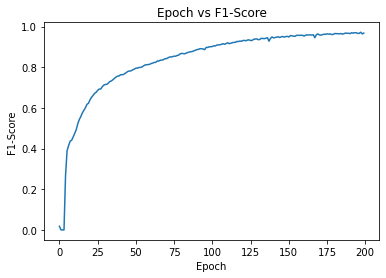

Test F1-Score 0.8524647355079651, Época:98

Test F1-Score 0.8484126329421997, Época:102

Test F1-Score 0.8477994203567505, Época:96

Test F1-Score 0.8476254940032959, Época:95

Test F1-Score 0.8472436666488647, Época:99

Test F1-Score 0.8455352187156677, Época:81

Test F1-Score 0.8452771306037903, Época:104

Test F1-Score 0.8450676202774048, Época:93

Test F1-Score 0.8449845910072327, Época:133

Test F1-Score 0.8441140651702881, Época:106


Train F1-Score 0.9720795154571533, Época:198

Train F1-Score 0.9699071049690247, Época:194

Train F1-Score 0.9696521759033203, Época:192

Train F1-Score 0.9694231748580933, Época:195

Train F1-Score 0.9681615233421326, Época:200

Train F1-Score 0.9680900573730469, Época:188

Train F1-Score 0.9677462577819824, Época:193

Train F1-Score 0.9671791195869446, Época:190

Train F1-Score 0.9667588472366333, Época:196

Train F1-Score 0.966746985912323, Época:189


Validation F1-Score 0.8452934622764587, Época:102

Validation F1-Score 0.8445358872413635, Époc

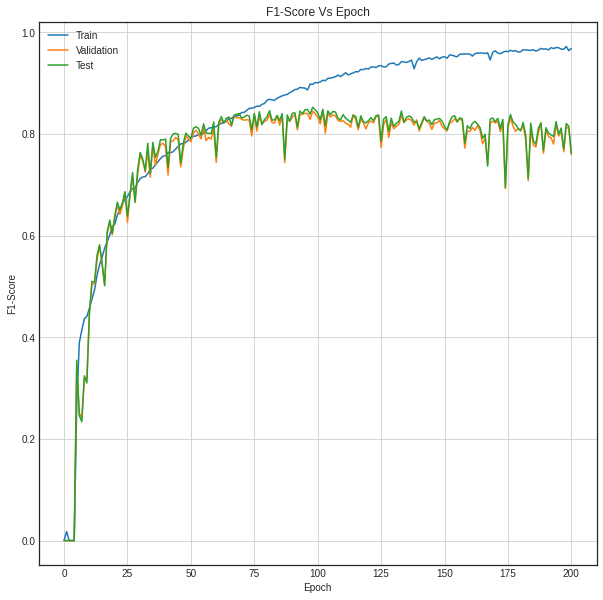

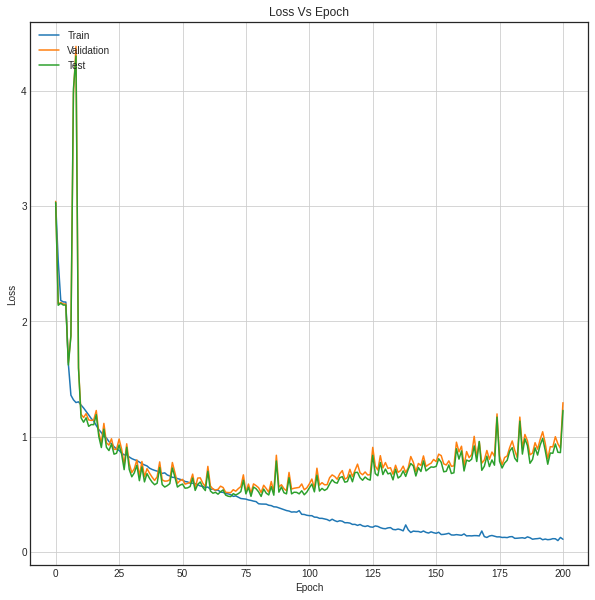

In [17]:
# plot metrics
plt.plot(history.history['f1_m'])
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.title('Epoch vs F1-Score')
plt.show()

#GRÁFICOS DE LAS TRES CURVAS TRAIN TEST Y VALIDACIÓN
graphics(history, AccTest, LossTest, log_Dir, model_Name, lossTEST, lossTRAIN, lossVALID, accuracyTEST, accuracyTRAIN, accuracyVALID)


Baseline Error train: 7.39%
Baseline Error dev: 24.03%
Baseline Error test: 23.83%
Accuracy: 0.9258413193670604
F1 score: 0.9306418328077529
Recall: 0.9258413193670604
Precision: 0.9549896534171233

 clasification report:
               precision    recall  f1-score   support

           1       1.00      0.99      0.99      9563
           3       1.00      0.55      0.71      1158
           4       1.00      0.86      0.92      1481
           8       0.00      0.00      0.00        71
           9       0.95      1.00      0.97      2896
          12       0.92      0.95      0.93      5006
          13       0.95      0.89      0.92      2465
          14       0.98      0.88      0.93      1717
          16       0.97      0.95      0.96       434
          17       0.99      1.00      0.99      3605
          18       1.00      0.73      0.84      8282
          19       0.47      1.00      0.64      2765
          20       0.99      1.00      0.99     14401

    accuracy       

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaco


 confusion matrix:
 [[ 9426     0     0     0   100     4     0     0     0    33     0     0
      0]
 [    0   641     1     0     0   238    44     0     0     0     2   230
      2]
 [    7     0  1275     0     0    84     1     0     0     0     0   113
      1]
 [    0     0     0     0     0    66     0     0     0     0     0     5
      0]
 [    2     0     0     0  2889     3     0     0     2     0     0     0
      0]
 [    2     0     0     0    33  4764    48     1     1     0     0   154
      3]
 [    0     0     0     0     0     0  2187     1     0     0     0   272
      5]
 [    0     0     0     0     0     3    14  1508     3     3     0   165
     21]
 [    0     0     0     0     1     2     0     7   412     4     0     0
      8]
 [    5     0     0     0     9     0     0     0     4  3587     0     0
      0]
 [    0     1     0     0     0    29    18    18     0     0  6055  2097
     64]
 [    0     0     0     0     0     0     1     0     0     0     

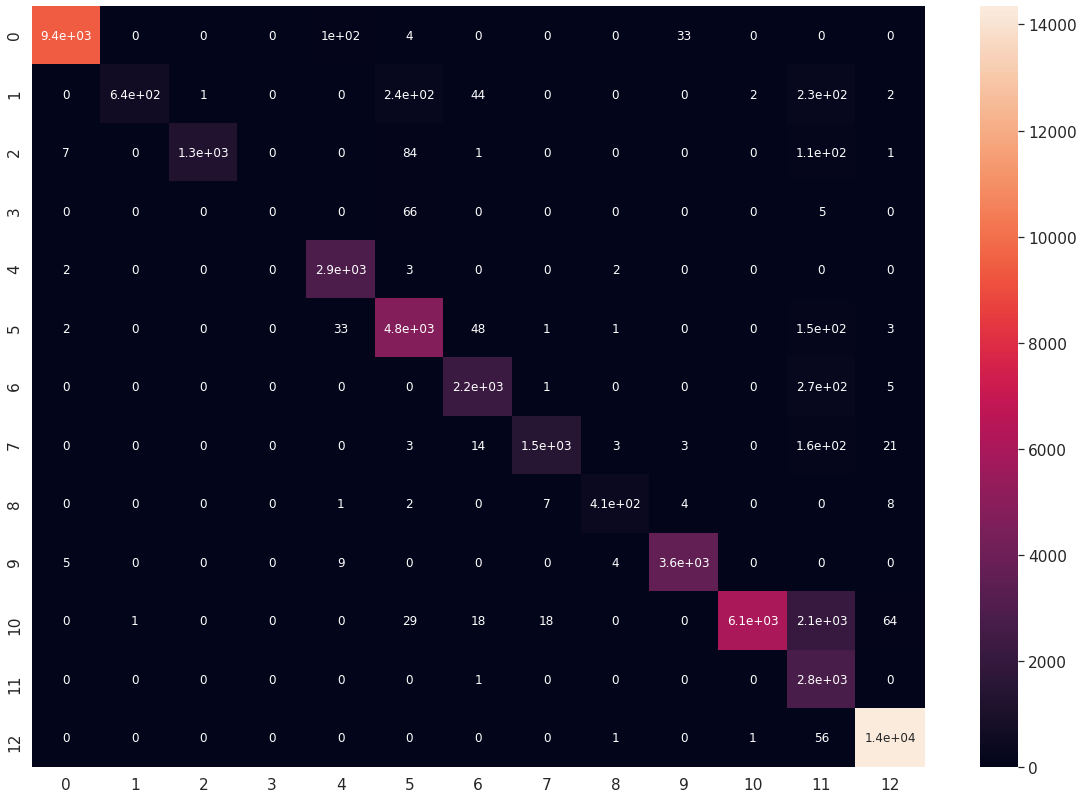

Accuracy: 0.7573551263001486
F1 score: 0.7646399325284716
Recall: 0.7573551263001486
Precision: 0.8123518223168373

 clasification report:
               precision    recall  f1-score   support

           1       0.85      0.74      0.79      1248
           3       0.95      0.35      0.52       155
           4       0.89      0.42      0.57       180
           8       0.00      0.00      0.00         6
           9       0.50      0.73      0.59       341
          12       0.59      0.66      0.63       599
          13       0.77      0.73      0.75       340
          14       0.64      0.48      0.55       218
          16       0.41      0.33      0.37        57
          17       0.72      0.81      0.77       430
          18       0.98      0.63      0.77      1055
          19       0.38      0.94      0.54       362
          20       0.96      0.96      0.96      1739

    accuracy                           0.76      6730
   macro avg       0.67      0.60      0.60     

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaco

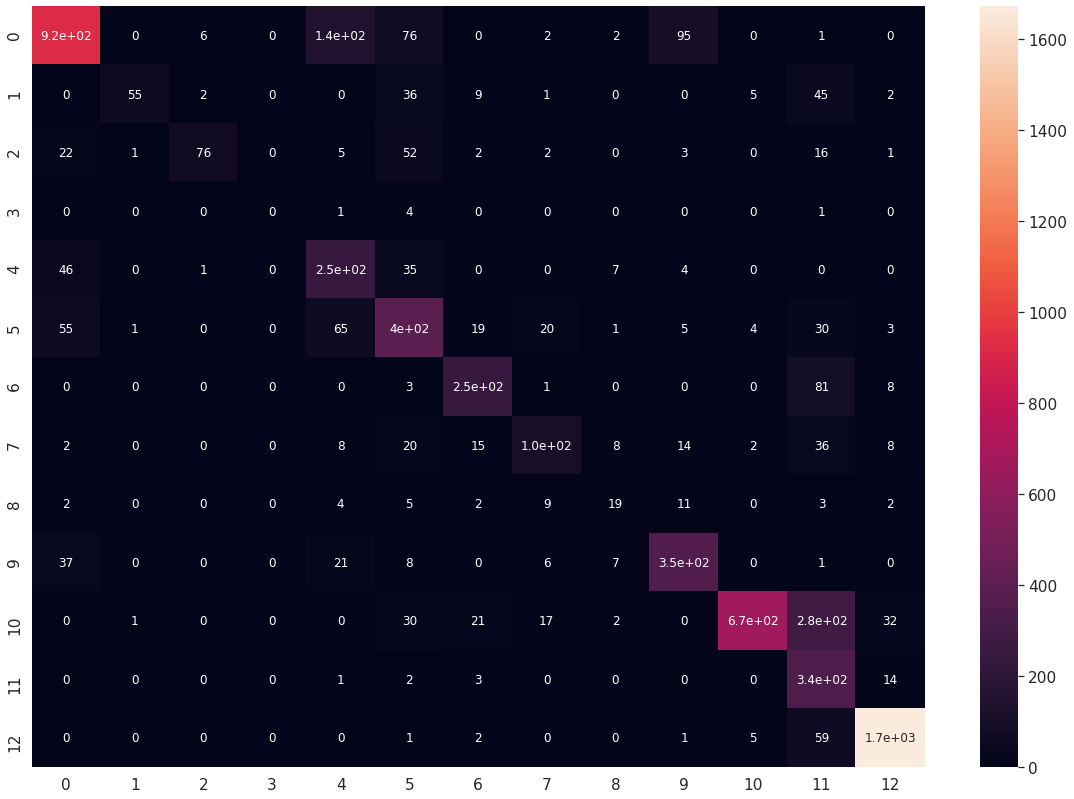

Accuracy: 0.7599168028524736
F1 score: 0.7658707848530425
Recall: 0.7599168028524736
Precision: 0.8127940468973449

 clasification report:
               precision    recall  f1-score   support

           1       0.86      0.74      0.79      1220
           3       0.98      0.32      0.49       145
           4       0.86      0.46      0.60       166
           8       0.00      0.00      0.00         7
           9       0.51      0.76      0.61       319
          12       0.56      0.63      0.59       575
          13       0.80      0.72      0.76       325
          14       0.65      0.47      0.55       201
          16       0.38      0.36      0.37        58
          17       0.74      0.79      0.76       497
          18       0.97      0.62      0.76      1059
          19       0.40      0.97      0.57       372
          20       0.95      0.97      0.96      1787

    accuracy                           0.76      6731
   macro avg       0.67      0.60      0.60     

/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaconda3/envs/tf22/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bioml/anaco

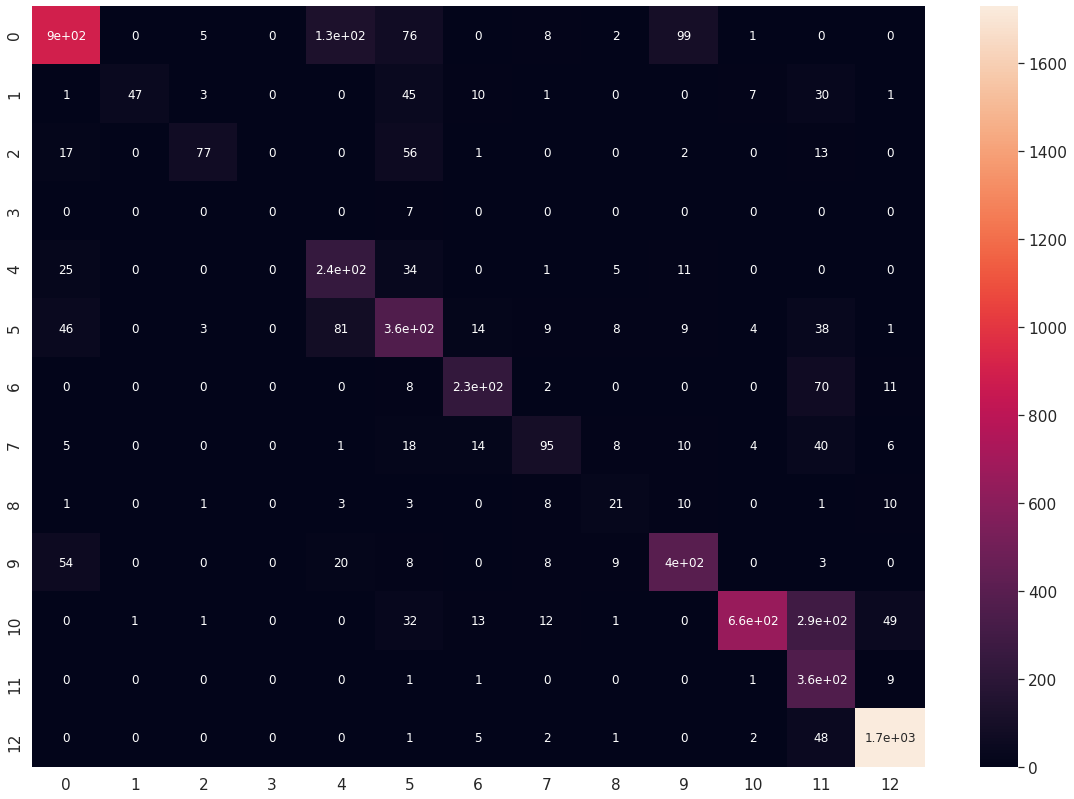

In [18]:
#model = tf.keras.models.load_model(log_Dir+'/saved-model-169-0.9455.hdf5', custom_objects={'f1_m':f1_m})
scores = model.evaluate(X_train, one_hot_labels_train, verbose=0)
print("Baseline Error train: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_dev, one_hot_labels_validation, verbose=0)
print("Baseline Error dev: %.2f%%" % (100-scores[1]*100))

scores = model.evaluate(X_test, one_hot_labels_test, verbose=0)
print("Baseline Error test: %.2f%%" % (100-scores[1]*100))

predictions = model.predict(X_train)

metrics(Y_train, [argmax(x) for x in predictions])

predictions = model.predict(X_dev)

metrics(Y_dev, [argmax(x) for x in predictions])

predictions = model.predict(X_test)

metrics(Y_test, [argmax(x) for x in predictions])